In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/

In [2]:
X=np.arange(0.0,5.0,0.1)

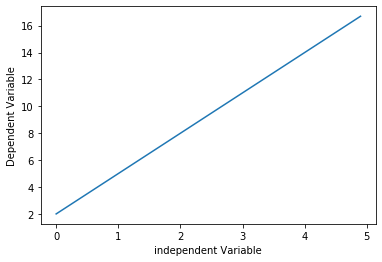

In [3]:
a=3
b=2
Y=a*X + b
plt.plot(X,Y)
plt.ylabel('Dependent Variable')
plt.xlabel('independent Variable')
plt.show()

In [4]:
x_data = np.random.rand(100).astype(np.float32)

In [5]:
y_data=x_data*3+2
y_data=np.vectorize(lambda y: y+np.random.normal(loc=0.0,scale=0.1))(y_data)

In [11]:
zip(x_data,y_data)[0:5]

TypeError: 'zip' object is not subscriptable

In [6]:
a=tf.Variable(1.0)
b=tf.Variable(1.0)
y=a*x_data+b
loss=tf.reduce_mean(tf.square(y-y_data))

In [7]:
optimizer=tf.train.GradientDescentOptimizer(0.5)
train=optimizer.minimize(loss)

In [8]:
init=tf.initialize_all_variables()
sess=tf.Session()
sess.run(init)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [9]:
train_data=[]
for step in range(100):
    evals=sess.run([train,a,b])[1:]
    if step%10==0:
        print (step,evals)
        train_data.append(evals)

0 [2.1693215, 2.9989438]
10 [2.4556212, 2.28811]
20 [2.7153277, 2.1486363]
30 [2.8454096, 2.0787776]
40 [2.9105647, 2.043787]
50 [2.943199, 2.026261]
60 [2.9595451, 2.0174825]
70 [2.9677327, 2.0130856]
80 [2.9718335, 2.0108833]
90 [2.9738877, 2.00978]


In [10]:
converter=plt.colors
cr,cg,cb =(1.0,1.0,0.0)
for f in train_data:
    cb+=1.0/len(train_data)
    cg-=1.0/len(train_data)
    if cb>1.0: cb=1.0
    if cg<0.0: cb=0.0
    [a,b]=f
    f_y = np.vectorize(lambda x:a*x+b)(x_data)
    line=plt.plot(x_data,f_y)
    plt.setp(line,color=(cr,cg,cb))
plt.plot(x_data,y_data,'ro')
green_line=mpatches.Patch(color='red', label='Data Points')
plt.legend(handles=[green_line])
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'colors'